In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [7]:
data=pd.read_csv('car-mpg.csv')

In [8]:
data.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,0,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,0,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,0,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,0,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,0,ford torino


In [9]:
data.car_type.value_counts()

1    211
0    187
Name: car_type, dtype: int64

In [4]:
data=data.drop(['car_type','car_name'],axis=1)

data.head()


,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [5]:
data.isnull().sum()

mpg       0
cyl       0
disp      0
hp        0
wt        0
acc       0
yr        0
origin    0
dtype: int64

In [6]:
data.dtypes

mpg       float64
cyl         int64
disp      float64
hp         object
wt          int64
acc       float64
yr          int64
origin      int64
dtype: object

In [ ]:
data

In [9]:
temp = pd.DataFrame(data.hp.str.isdigit())

In [10]:
data=data.replace('?',np.nan)

In [11]:
data[data.isnull().any(axis=1)]

,mpg,cyl,disp,hp,wt,acc,yr,origin
32,25.0,4,98.0,NaN,2046,19.0,71,1
126,21.0,6,200.0,NaN,2875,17.0,74,1
330,40.9,4,85.0,NaN,1835,17.3,80,2
336,23.6,4,140.0,NaN,2905,14.3,80,1
354,34.5,4,100.0,NaN,2320,15.8,81,2
374,23.0,4,151.0,NaN,3035,20.5,82,1


In [12]:
data['hp']=data['hp'].fillna(data.hp.median())
#data['hp'].isnull().sum()

In [13]:
data.hp.dtypes

dtype('O')

In [14]:
data['hp']=data['hp'].astype('float64')

In [15]:
data.dtypes

mpg       float64
cyl         int64
disp      float64
hp        float64
wt          int64
acc       float64
yr          int64
origin      int64
dtype: object

In [16]:
### Elbow method
ks=range(1,8)
inertia=[]

In [17]:
for k in ks:
    model=KMeans(n_clusters=k)
    model.fit(data)
    inertia.append(model.inertia_)

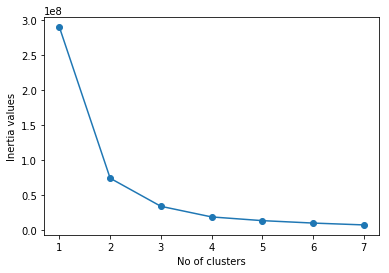

In [18]:
plt.plot(ks,inertia,'-o')
plt.xlabel('No of clusters')
plt.ylabel('Inertia values')
plt.xticks(ks)
plt.show()

In [19]:
models=KMeans(n_clusters=4)
models.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [20]:
labels=models.predict(data)
labels

array([3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 3, 3, 3, 2, 0, 0, 0, 2, 2, 0, 2,
       2, 2, 0, 1, 1, 1, 1, 2, 2, 2, 2, 0, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1,
       1, 0, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1,
       3, 1, 1, 1, 1, 2, 3, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 1, 3, 1,
       1, 3, 1, 1, 1, 1, 1, 1, 3, 3, 3, 0, 0, 0, 2, 1, 1, 1, 1, 0, 2, 2,
       2, 2, 2, 0, 2, 1, 1, 2, 2, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3, 2, 0, 2,
       0, 3, 3, 3, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 3, 3,
       3, 3, 1, 1, 1, 1, 3, 3, 3, 3, 0, 3, 3, 2, 0, 0, 0, 0, 2, 0, 0, 2,
       3, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 1, 1, 1, 1, 3, 3, 0, 0, 2, 2, 2,
       2, 3, 3, 3, 3, 2, 2, 2, 0, 3, 1, 3, 0, 3, 1, 1, 3, 3, 2, 2, 2, 2,
       2, 3, 1, 1, 1, 3, 3, 3, 3, 1, 1, 1, 1, 2, 0, 2, 0, 2, 2, 2, 2, 0,
       0, 0, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 0, 3, 3, 3, 3,
       3, 1, 2, 0, 2, 2, 0, 0, 0, 2, 0, 3, 0, 3, 2, 2, 3, 0, 0, 3, 3, 3,
       3, 1, 3, 1, 1, 3, 1, 2, 2, 2, 0, 3, 3, 3, 3,

In [21]:
# Finding the centroids
centroids=models.cluster_centers_
#centroids

In [22]:
centroid_x=centroids[:,0]
centroid_y=centroids[:,3]


In [23]:
xs=data.iloc[:,0]
ys=data.iloc[:,3]

In [34]:
x=data.iloc[:,[0,3]]

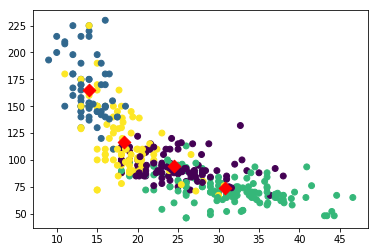

In [25]:
#plot the centroids with centroid location
import matplotlib.pyplot as plt
plt.scatter(xs,ys,c=labels,s=35)
plt.scatter(centroid_x,centroid_y,marker="D",c="r",s=80)
plt.show()

In [26]:
np.sqrt((9+4+36))

7.0

In [37]:
x1=[[-1,2,3]]
y=[[4,0,-3]]

In [38]:
from sklearn.metrics.pairwise import euclidean_distances

In [39]:
euclidean_distances(x1,y)

array([[8.06225775]])

In [40]:
#importing the hierarchy
import scipy.cluster.hierarchy as sch

Text(0,0.5,'Distance Measure')

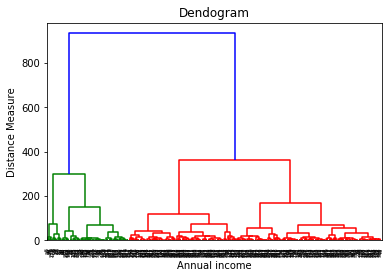

In [41]:
dendrogram=sch.dendrogram(sch.linkage(x,method='ward'))
plt.title('Dendogram')
plt.xlabel('Annual income')
plt.ylabel('Distance Measure')